## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0   0.451872  1404.608195  0.525296  10.173970  1.682226
1  57.521761   570.790766  0.767840   6.750708  1.288609
2  54.218657  1204.004465  0.998125   1.062241  1.456793
3  25.800845  1630.669585  0.883724   3.490979  1.433014
4  92.747211  1326.857337  0.999360   1.681432  1.684160


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.7873381	total: 68.7ms	remaining: 1m 8s
1:	learn: 0.7809951	total: 69.2ms	remaining: 34.5s
2:	learn: 0.7754111	total: 69.8ms	remaining: 23.2s
3:	learn: 0.7688511	total: 70.3ms	remaining: 17.5s
4:	learn: 0.7613671	total: 70.7ms	remaining: 14.1s
5:	learn: 0.7549112	total: 71.3ms	remaining: 11.8s
6:	learn: 0.7478651	total: 71.7ms	remaining: 10.2s
7:	learn: 0.7402981	total: 72.3ms	remaining: 8.96s
8:	learn: 0.7327671	total: 72.8ms	remaining: 8.01s
9:	learn: 0.7245379	total: 73.1ms	remaining: 7.24s
10:	learn: 0.7177864	total: 73.5ms	remaining: 6.61s
11:	learn: 0.7102680	total: 74ms	remaining: 6.09s
12:	learn: 0.7031186	total: 74.4ms	remaining: 5.65s
13:	learn: 0.6961989	total: 74.8ms	remaining: 5.27s
14:	learn: 0.6890453	total: 75.2ms	remaining: 4.94s
15:	learn: 0.6827515	total: 75.7ms	remaining: 4.65s
16:	learn: 0.6756647	total: 76.1ms	remaining: 4.4s
17:	learn: 0.6688197	total: 76.5ms	remaining: 4.17s
18:	learn: 0.6638702	total: 76.8ms	remaining: 3

96:	learn: 0.3559512	total: 108ms	remaining: 1s
97:	learn: 0.3540429	total: 108ms	remaining: 998ms
98:	learn: 0.3516225	total: 109ms	remaining: 990ms
99:	learn: 0.3491377	total: 109ms	remaining: 983ms
100:	learn: 0.3470726	total: 110ms	remaining: 975ms
101:	learn: 0.3454425	total: 110ms	remaining: 967ms
102:	learn: 0.3435872	total: 110ms	remaining: 960ms
103:	learn: 0.3417244	total: 111ms	remaining: 954ms
104:	learn: 0.3396208	total: 111ms	remaining: 947ms
105:	learn: 0.3370851	total: 112ms	remaining: 941ms
106:	learn: 0.3346831	total: 112ms	remaining: 935ms
107:	learn: 0.3331097	total: 112ms	remaining: 928ms
108:	learn: 0.3312492	total: 113ms	remaining: 922ms
109:	learn: 0.3293497	total: 113ms	remaining: 914ms
110:	learn: 0.3269156	total: 113ms	remaining: 908ms
111:	learn: 0.3248204	total: 114ms	remaining: 902ms
112:	learn: 0.3233215	total: 114ms	remaining: 896ms
113:	learn: 0.3213809	total: 115ms	remaining: 891ms
114:	learn: 0.3199277	total: 115ms	remaining: 885ms
115:	learn: 0.31735

282:	learn: 0.1606392	total: 186ms	remaining: 472ms
283:	learn: 0.1596105	total: 187ms	remaining: 470ms
284:	learn: 0.1589706	total: 187ms	remaining: 469ms
285:	learn: 0.1587440	total: 187ms	remaining: 468ms
286:	learn: 0.1584783	total: 188ms	remaining: 467ms
287:	learn: 0.1576959	total: 188ms	remaining: 465ms
288:	learn: 0.1574537	total: 189ms	remaining: 464ms
289:	learn: 0.1572392	total: 189ms	remaining: 463ms
290:	learn: 0.1570029	total: 190ms	remaining: 462ms
291:	learn: 0.1563146	total: 190ms	remaining: 460ms
292:	learn: 0.1560494	total: 190ms	remaining: 459ms
293:	learn: 0.1558283	total: 191ms	remaining: 458ms
294:	learn: 0.1551506	total: 191ms	remaining: 456ms
295:	learn: 0.1549414	total: 191ms	remaining: 455ms
296:	learn: 0.1547119	total: 192ms	remaining: 454ms
297:	learn: 0.1544886	total: 192ms	remaining: 453ms
298:	learn: 0.1542671	total: 193ms	remaining: 452ms
299:	learn: 0.1540440	total: 193ms	remaining: 451ms
300:	learn: 0.1537977	total: 194ms	remaining: 450ms
301:	learn: 

524:	learn: 0.0869278	total: 289ms	remaining: 261ms
525:	learn: 0.0867357	total: 289ms	remaining: 261ms
526:	learn: 0.0865477	total: 290ms	remaining: 260ms
527:	learn: 0.0864489	total: 290ms	remaining: 259ms
528:	learn: 0.0863065	total: 291ms	remaining: 259ms
529:	learn: 0.0859428	total: 291ms	remaining: 258ms
530:	learn: 0.0857613	total: 291ms	remaining: 257ms
531:	learn: 0.0853588	total: 292ms	remaining: 257ms
532:	learn: 0.0850876	total: 292ms	remaining: 256ms
533:	learn: 0.0849103	total: 293ms	remaining: 255ms
534:	learn: 0.0845913	total: 293ms	remaining: 255ms
535:	learn: 0.0842784	total: 294ms	remaining: 254ms
536:	learn: 0.0841048	total: 294ms	remaining: 254ms
537:	learn: 0.0837980	total: 295ms	remaining: 253ms
538:	learn: 0.0836280	total: 295ms	remaining: 252ms
539:	learn: 0.0832413	total: 295ms	remaining: 251ms
540:	learn: 0.0828483	total: 296ms	remaining: 251ms
541:	learn: 0.0824643	total: 296ms	remaining: 250ms
542:	learn: 0.0820891	total: 297ms	remaining: 250ms
543:	learn: 

705:	learn: 0.0491752	total: 368ms	remaining: 153ms
706:	learn: 0.0491230	total: 368ms	remaining: 153ms
707:	learn: 0.0490173	total: 369ms	remaining: 152ms
708:	learn: 0.0488476	total: 369ms	remaining: 151ms
709:	learn: 0.0487991	total: 370ms	remaining: 151ms
710:	learn: 0.0487513	total: 370ms	remaining: 150ms
711:	learn: 0.0487042	total: 370ms	remaining: 150ms
712:	learn: 0.0485581	total: 371ms	remaining: 149ms
713:	learn: 0.0483436	total: 372ms	remaining: 149ms
714:	learn: 0.0481917	total: 372ms	remaining: 148ms
715:	learn: 0.0481419	total: 372ms	remaining: 148ms
716:	learn: 0.0479997	total: 373ms	remaining: 147ms
717:	learn: 0.0478268	total: 373ms	remaining: 147ms
718:	learn: 0.0477776	total: 374ms	remaining: 146ms
719:	learn: 0.0477309	total: 374ms	remaining: 145ms
720:	learn: 0.0475808	total: 374ms	remaining: 145ms
721:	learn: 0.0474197	total: 375ms	remaining: 144ms
722:	learn: 0.0473741	total: 375ms	remaining: 144ms
723:	learn: 0.0472159	total: 375ms	remaining: 143ms
724:	learn: 

942:	learn: 0.0247426	total: 471ms	remaining: 28.5ms
943:	learn: 0.0246568	total: 472ms	remaining: 28ms
944:	learn: 0.0245825	total: 472ms	remaining: 27.5ms
945:	learn: 0.0244992	total: 473ms	remaining: 27ms
946:	learn: 0.0244364	total: 473ms	remaining: 26.5ms
947:	learn: 0.0243632	total: 474ms	remaining: 26ms
948:	learn: 0.0242824	total: 474ms	remaining: 25.5ms
949:	learn: 0.0242021	total: 475ms	remaining: 25ms
950:	learn: 0.0241258	total: 475ms	remaining: 24.5ms
951:	learn: 0.0240515	total: 476ms	remaining: 24ms
952:	learn: 0.0239873	total: 476ms	remaining: 23.5ms
953:	learn: 0.0238940	total: 477ms	remaining: 23ms
954:	learn: 0.0238526	total: 477ms	remaining: 22.5ms
955:	learn: 0.0237615	total: 477ms	remaining: 22ms
956:	learn: 0.0237217	total: 478ms	remaining: 21.5ms
957:	learn: 0.0236494	total: 478ms	remaining: 21ms
958:	learn: 0.0235803	total: 479ms	remaining: 20.5ms
959:	learn: 0.0235097	total: 479ms	remaining: 20ms
960:	learn: 0.0234384	total: 480ms	remaining: 19.5ms
961:	learn:

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

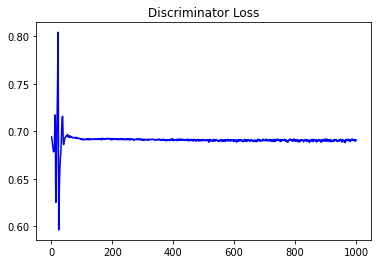

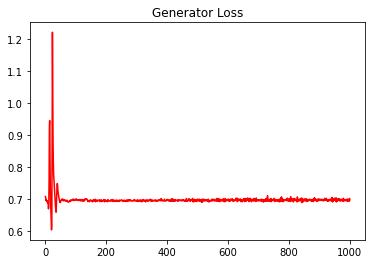

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.7749744602838896


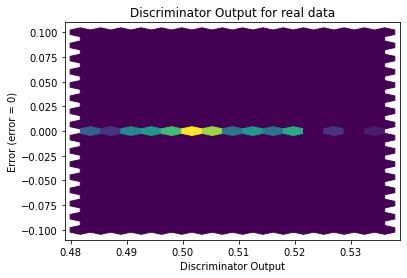

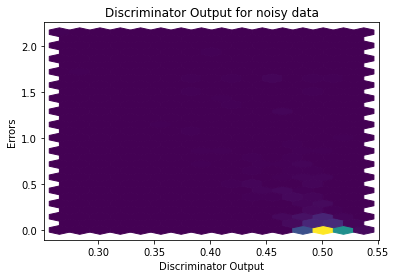

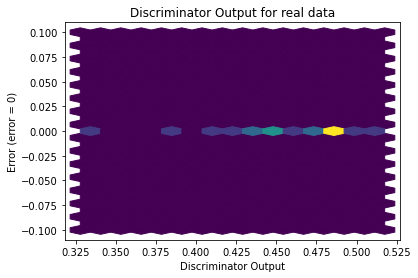

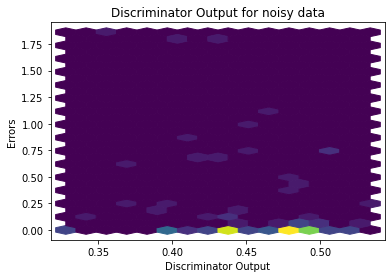

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


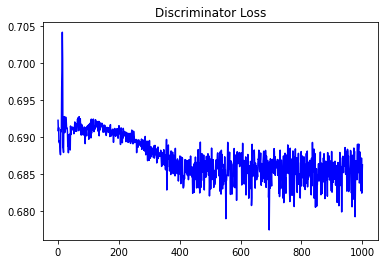

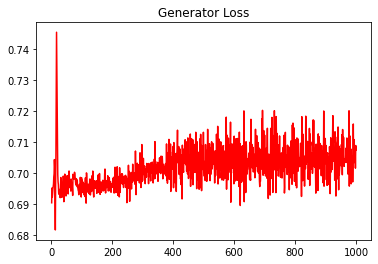

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.9580837822579945


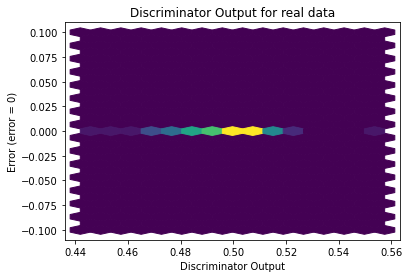

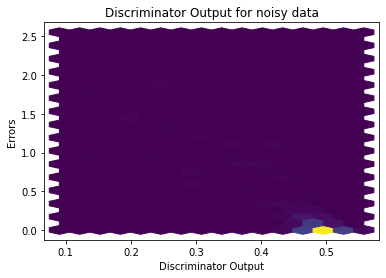

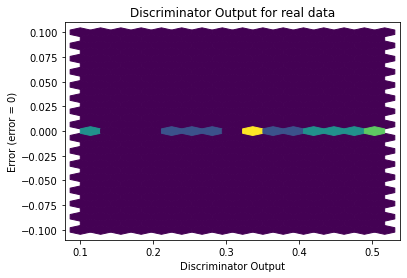

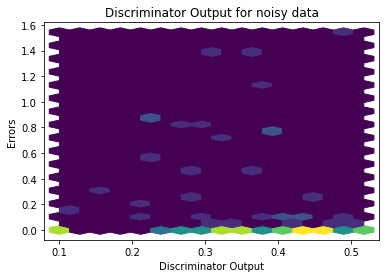

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8078]], requires_grad=True)
